In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


Import the Fashion MNIST dataset

In [2]:
FashionMNIST = tf.keras.datasets.fashion_mnist

In [3]:
# Loading the dataset returns four NumPy arrays:

# The train_images and train_labels arrays are the training set—the data the model uses to learn.
# The model is tested against the test set, the test_images, and test_labels arrays.

(xtrain, ytrain), (xtest, ytest) = FashionMNIST.load_data()

In [4]:
# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
ytrain

# there are in total of 60000 images that will be train to create a model

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(class_names)

10

# Preprocess the data

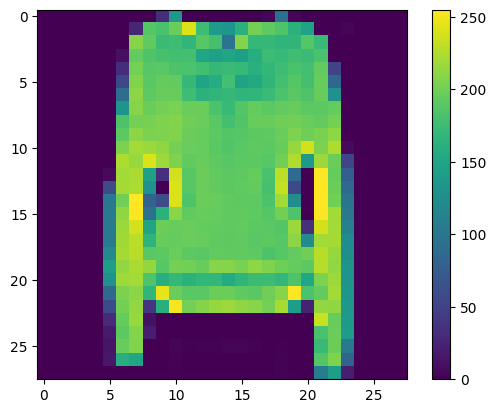

In [8]:
import random

i = random.randint(0,59999)

plt.figure()
plt.imshow(xtrain[i])
plt.colorbar()
plt.grid(False)
plt.show()

# Scaling

In [9]:
xtrain = xtrain / 255.0

xtest = xtest / 255.0

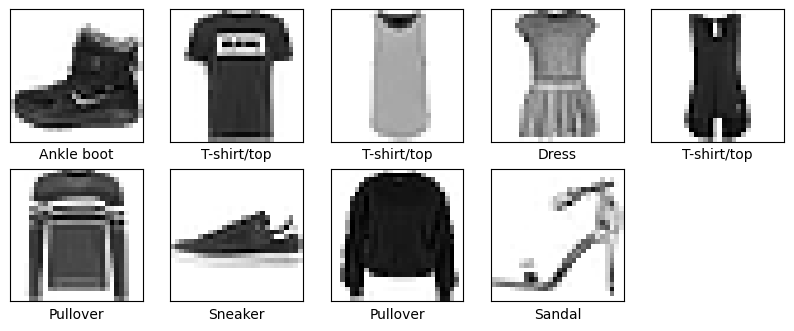

In [10]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[ytrain[i]])
plt.show()

# Build the model

In [11]:
model = tf.keras.Sequential()

res = (28,28)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=res),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\Jovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [13]:
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [14]:
# Training the neural network model requires the following steps:

# 1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
# 2. The model learns to associate images and labels.
# 3. You ask the model to make predictions about a test set—in this example, the test_images array.
# 4. Verify that the predictions match the labels from the test_labels array.

model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7855 - loss: 0.6337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3754
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8756 - loss: 0.3405
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8844 - loss: 0.3142
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.2992
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8947 - loss: 0.2844
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.9002 - loss: 0.2696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9072 - loss: 0.2555
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9069 - loss: 0.2460
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9126 - loss: 0.2361


In [15]:
test_loss, test_acc = model.evaluate(xtrain,  ytrain, verbose=2)

print('\nTest accuracy:', test_acc)

1875/1875 - 1s - 584us/step - accuracy: 0.9196 - loss: 0.2160

Test accuracy: 0.9195666909217834


Evaluate accuracy

In [16]:
score =  model.evaluate(xtest, ytest, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Test score 0.3309032917022705
Test accuracy 0.8848999738693237


In [17]:
#With the model trained, you can use it to make predictions about some images. 
#Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


In [18]:
predictions

array([[7.4952322e-10, 1.8738276e-10, 7.1302041e-11, ..., 1.4777541e-03,
        9.8732251e-08, 9.9826533e-01],
       [2.3229824e-05, 3.1379590e-17, 9.9956506e-01, ..., 3.3373505e-11,
        7.6546901e-11, 4.4222286e-13],
       [5.9365863e-07, 9.9999940e-01, 1.1811924e-11, ..., 1.8978080e-25,
        7.7462307e-15, 7.9105748e-19],
       ...,
       [2.4462652e-05, 1.5220467e-11, 7.3431607e-07, ..., 9.8040485e-11,
        9.9992979e-01, 2.4291211e-12],
       [3.6107524e-09, 9.9998128e-01, 1.4133520e-09, ..., 3.2387240e-14,
        4.1241882e-10, 4.7662881e-11],
       [1.1044607e-06, 8.6485780e-10, 1.2188092e-07, ..., 6.1854400e-04,
        3.5257388e-05, 2.9102666e-06]], dtype=float32)

In [19]:
for i in range(10):
    print("=====Model Prediction #",i)
    print("Predicted Value:", ytest[i])
    print("Actual Value:",np.argmax(predictions[i]))
    print()

=====Model Prediction # 0
Predicted Value: 9
Actual Value: 9

=====Model Prediction # 1
Predicted Value: 2
Actual Value: 2

=====Model Prediction # 2
Predicted Value: 1
Actual Value: 1

=====Model Prediction # 3
Predicted Value: 1
Actual Value: 1

=====Model Prediction # 4
Predicted Value: 6
Actual Value: 0

=====Model Prediction # 5
Predicted Value: 1
Actual Value: 1

=====Model Prediction # 6
Predicted Value: 4
Actual Value: 4

=====Model Prediction # 7
Predicted Value: 6
Actual Value: 6

=====Model Prediction # 8
Predicted Value: 5
Actual Value: 5

=====Model Prediction # 9
Predicted Value: 7
Actual Value: 7



# Verify Predictions

In [20]:
# With the model trained, you can use it to make predictions about some images.

# Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percentage (out of 100) for the predicted label.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

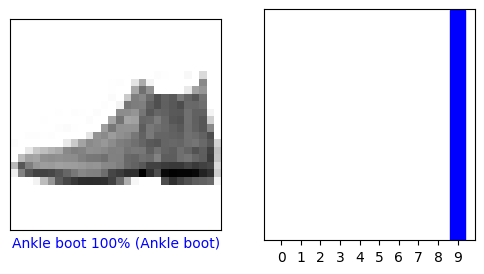

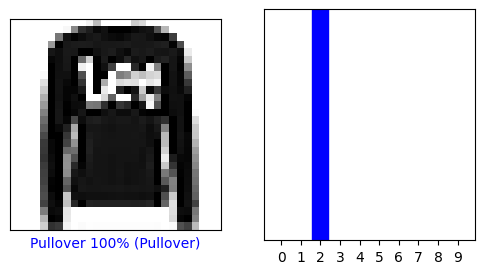

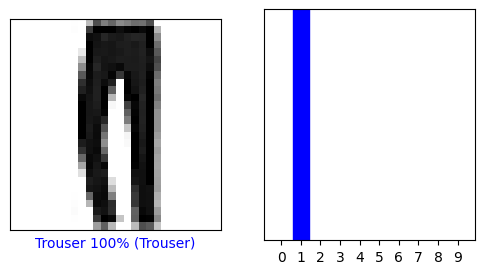

In [22]:
for i in range(3):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], ytest, xtest)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  ytest)
    plt.show()

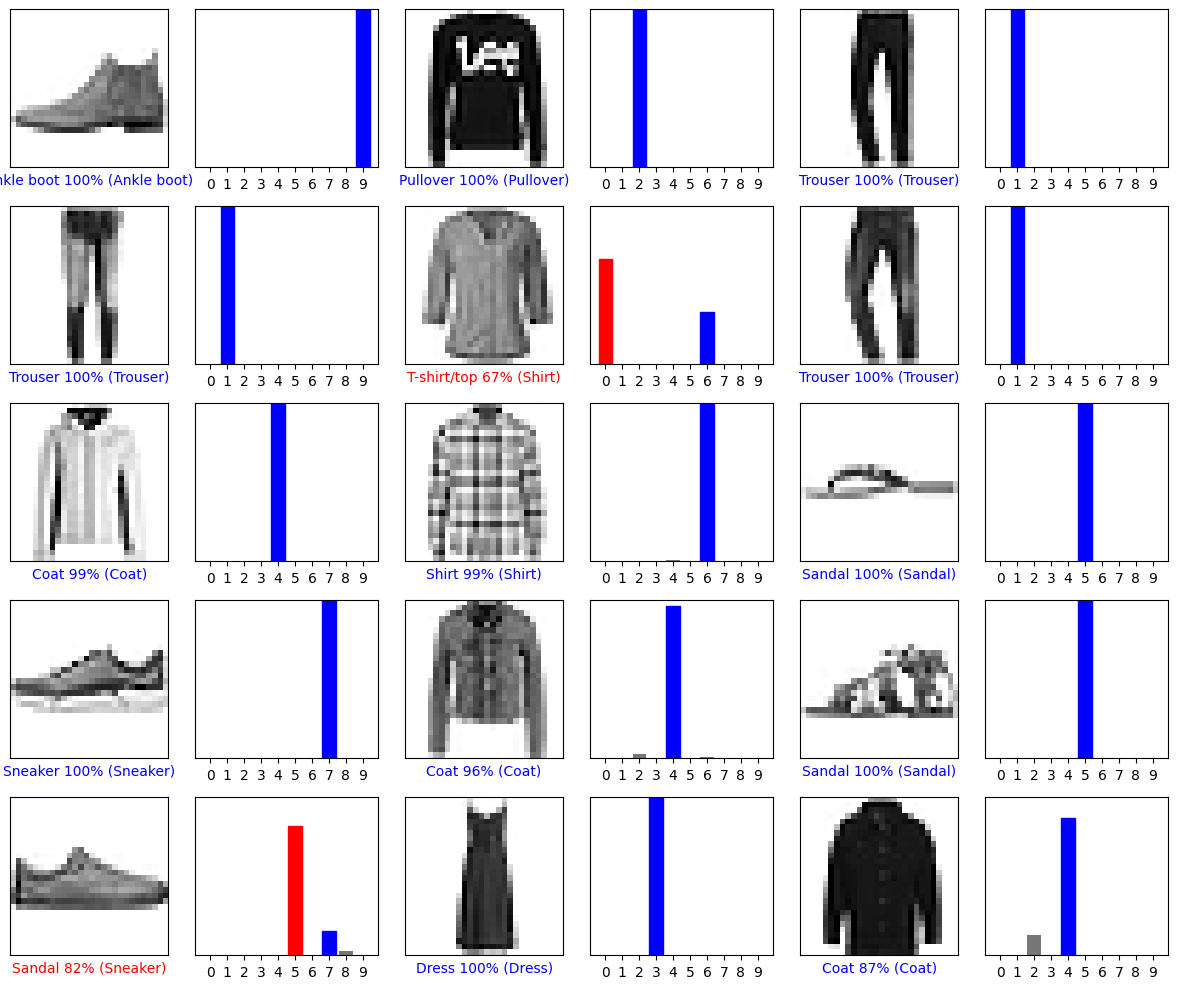

In [23]:
# Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], ytest)
plt.tight_layout()
plt.show()

# Use Model

In [24]:
# Finally, use the trained model to make a prediction about a single image.
# Grab an image from the test dataset.
img = xtest[1]

print(img.shape)

(28, 28)


In [25]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, 
# even though you're using a single image, you need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
#Now predict the correct label for this image:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[2.3229868e-05 3.1379709e-17 9.9956506e-01 6.4675439e-11 3.3702745e-04
  2.0551999e-11 7.4722011e-05 3.3373568e-11 7.6547192e-11 4.4222202e-13]]


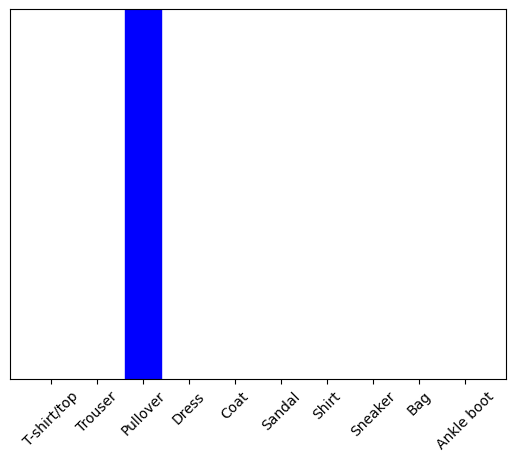

In [27]:

plot_value_array(1, predictions_single[0], ytest)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
# tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data.
# Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])

2

In [29]:
# And the model predicts a label as expected.